# **Esercizio Scikit-Learn**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

1. Carica il dataset Iris.

In [16]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data 
y = data.target

In [18]:
df = pd.DataFrame(X,y)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


2. Standardizza le caratteristiche utilizzando StandardScaler.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Suddividi i dati in training e test set (70% training, 30% test).


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [24]:
print("Dimensione dataset di partenza:", X_scaled.size,"\nDimensione training set:",X_train.size,"\nDimensione test set:",X_test.size)

Dimensione dataset di partenza: 2314 
Dimensione training set: 1612 
Dimensione test set: 702


4. Applica l'algoritmo DecisionTreeClassifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
errori = y_test - y_pred

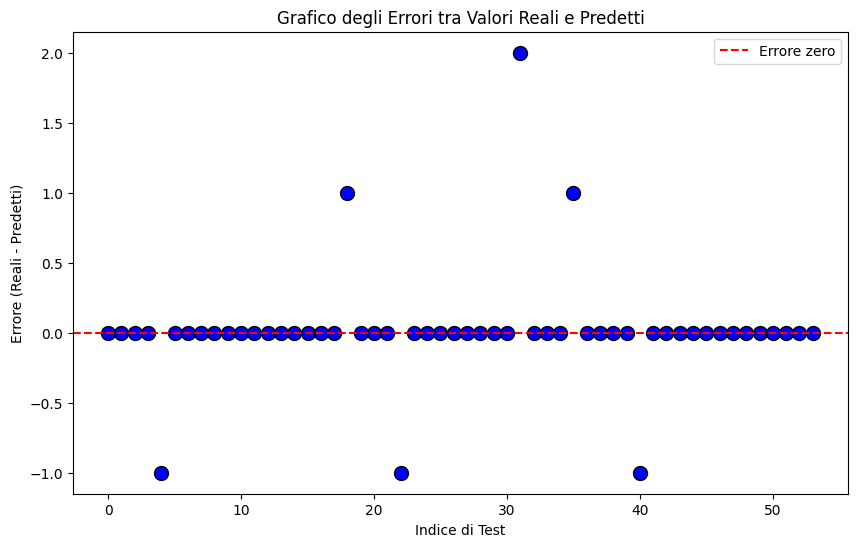

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(errori)), errori, color='blue', edgecolor='k', s=100)
plt.axhline(y=0, color='red', linestyle='--', label='Errore zero')
plt.xlabel('Indice di Test')
plt.ylabel('Errore (Reali - Predetti)')
plt.title('Grafico degli Errori tra Valori Reali e Predetti')
plt.legend()
plt.show()

5. Valuta la performance del modello utilizzando il classification_report(precisione, recall, F1-score).

In [29]:
from sklearn.metrics import classification_report, accuracy_score
metrics = classification_report(y_test, y_pred)

In [30]:
accuracy = accuracy_score(y_test, y_pred,normalize=False)

In [33]:
print("Elementi non classificati correttamente:",len(y_test)-int(accuracy))

Elementi non classificati correttamente: 6


In [6]:
print(metrics)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.78      0.88        23
           2       0.75      0.90      0.82        10

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.91      0.89      0.89        54



6. Visualizza la matrice di confusione.

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
cm = confusion_matrix(y_test, y_pred)

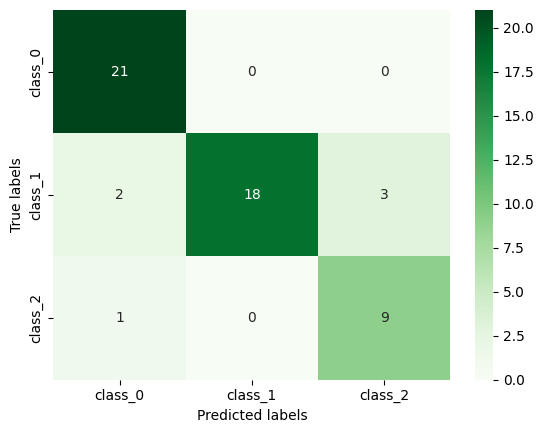

In [9]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()